### Machine Learning for Data Quality Prediction
**Description**: Use a machine learning model to predict data quality issues.

**Steps**:
1. Create a mock dataset with features and label (quality issue/label: 0: good, 1: issue).
2. Train a machine learning model.
3. Evaluate the model performance.

In [ ]:
# write your code from here

Sample of mock dataset:
    missing_values  duplicate_rows  outliers_count  data_type_mismatches  \
0               3               0               0                     0   
1               4               0               9                     1   
2               2               2               7                     1   
3               4               1               7                     0   
4               4               0               0                     1   

   null_percentage  label  
0         0.484077      0  
1         0.747444      0  
2         0.473810      1  
3         0.057844      0  
4         0.957790      0  

Confusion Matrix:
 [[125  17]
 [ 48  10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.88      0.79       142
           1       0.37      0.17      0.24        58

    accuracy                           0.68       200
   macro avg       0.55      0.53      0.51       200
weighted avg    

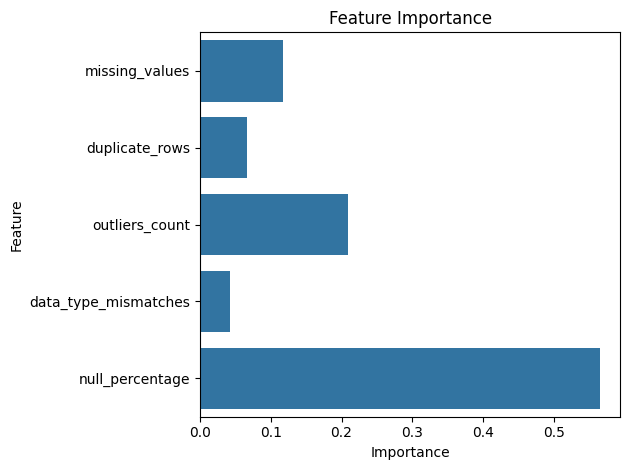

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create mock dataset
np.random.seed(42)

# Create a mock dataset with 1000 samples and common quality-related features
data = pd.DataFrame({
    'missing_values': np.random.randint(0, 5, 1000),
    'duplicate_rows': np.random.randint(0, 3, 1000),
    'outliers_count': np.random.randint(0, 10, 1000),
    'data_type_mismatches': np.random.randint(0, 2, 1000),
    'null_percentage': np.random.uniform(0, 1, 1000),
    'label': np.random.choice([0, 1], 1000, p=[0.7, 0.3])  # 0: good, 1: issue
})

print("Sample of mock dataset:\n", data.head())

# Step 2: Split into train and test
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 3: Evaluate performance
y_pred = model.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Optional: Visualize feature importance
importances = model.feature_importances_
feature_names = X.columns
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
